In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

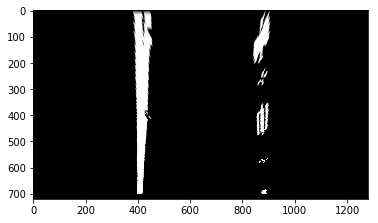

In [39]:
# Read in a thresholded image
warped = mpimg.imread('../output_images/straight_lines1.jpg')[:,:,1]
plt.imshow(warped, cmap="gray")

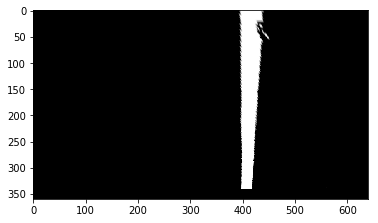

In [46]:
crop = warped[int(warped.shape[0]/2):,:int(warped.shape[1]/2)]
plt.imshow(crop, cmap="gray")


In [44]:
# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def find_window_centroids(image, window_width, window_height, margin):
        
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(image[int(image.shape[0]/2):,:int(image.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    plt.plot(l_sum)
    r_sum = np.sum(image[int(image.shape[0]/2):,int(image.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(image.shape[1]/2)
    return l_center

418.0


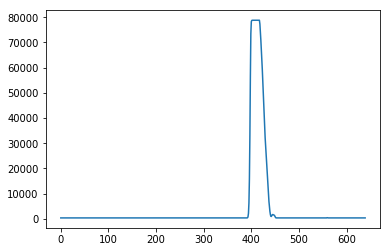

In [45]:
window_centroids = find_window_centroids(warped, window_width, window_height, margin)
print (window_centroids)